## Data Visualization

### Importing libraries

In [1]:
# data_visualization.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching the `stock_news.csv` file

In [2]:
# Read the CSV file
df = pd.read_csv('stocks_news.csv')

# Display the first few rows of the DataFrame to inspect the data
df.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1673080200,Why a stock market obsessed with the Fed's inf...,118220769,https://images.mktw.net/im-698783/social,AMZN,MarketWatch,The focus at the Federal Reserve is increasing...,https://finnhub.io/api/news?id=c8a2424a0b0962f...
1,company,1673079469,Wall Street Breakfast: What Moved Markets,118192290,https://static.seekingalpha.com/uploads/2021/7...,AMZN,SeekingAlpha,Listen on the go! A daily podcast of Wall Stre...,https://finnhub.io/api/news?id=95150f418540d14...
2,company,1673070461,"Amazon, Not So Prime - Sell",118190452,https://static.seekingalpha.com/cdn/s3/uploads...,AMZN,SeekingAlpha,Amazon is going through a rough couple of mont...,https://finnhub.io/api/news?id=9ff6320195ec697...
3,company,1673069756,The Valuation Argument To Own Google,118190071,https://static.seekingalpha.com/cdn/s3/uploads...,AMZN,SeekingAlpha,"Google continues to deliver record results, ye...",https://finnhub.io/api/news?id=2b7954d0a513043...
4,company,1673042493,"Biggest movers of the week: Bed, Bath & Beyond...",118174798,https://s.yimg.com/ny/api/res/1.2/Dy1cJZ4npmKg...,AMZN,Yahoo,Yahoo Finance Live anchor Seana Smith looks at...,https://finnhub.io/api/news?id=4f8508ff2805da2...


### Checking the column names and NaN values in them

In [3]:
# Display the column names
print("Column Names:")
print(df.columns)

# Check the number of NaN values in each column
na_counts = df.isna().sum()

# Display the number of NaN values in each column
print("\nNumber of NaN values in each column:")
print(na_counts)

Column Names:
Index(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source',
       'summary', 'url'],
      dtype='object')

Number of NaN values in each column:
category        0
datetime        0
headline        8
id              0
image       12220
related         0
source          0
summary       555
url             0
dtype: int64


### Dropping Uneccesary Columns

In [4]:
df.drop(columns=['image', 'category'], inplace=True)
df.head(10)

,datetime,headline,id,related,source,summary,url
0,1673080200,Why a stock market obsessed with the Fed's inf...,118220769,AMZN,MarketWatch,The focus at the Federal Reserve is increasing...,https://finnhub.io/api/news?id=c8a2424a0b0962f...
1,1673079469,Wall Street Breakfast: What Moved Markets,118192290,AMZN,SeekingAlpha,Listen on the go! A daily podcast of Wall Stre...,https://finnhub.io/api/news?id=95150f418540d14...
2,1673070461,"Amazon, Not So Prime - Sell",118190452,AMZN,SeekingAlpha,Amazon is going through a rough couple of mont...,https://finnhub.io/api/news?id=9ff6320195ec697...
3,1673069756,The Valuation Argument To Own Google,118190071,AMZN,SeekingAlpha,"Google continues to deliver record results, ye...",https://finnhub.io/api/news?id=2b7954d0a513043...
4,1673042493,"Biggest movers of the week: Bed, Bath & Beyond...",118174798,AMZN,Yahoo,Yahoo Finance Live anchor Seana Smith looks at...,https://finnhub.io/api/news?id=4f8508ff2805da2...
5,1673038800,3 Unstoppable Stocks to Buy for 2023,118174799,AMZN,Yahoo,If you're hunting for more great stocks to add...,https://finnhub.io/api/news?id=14f7c81028daa6a...
6,1673037525,"Down 49% in This Bear Market, Can Amazon Stock...",118174800,AMZN,Yahoo,Amazon is the largest e-commerce player in the...,https://finnhub.io/api/news?id=0a4e00eb3e18077...
7,1673036040,The Case for Holding—Not Selling—GE’s Healthca...,118220773,AMZN,MarketWatch,GE HealthCare Technologies is currently being ...,https://finnhub.io/api/news?id=9c92ec752527953...
8,1673035674,Salesforce co-CEO Marc Benioff hints at more p...,118182525,AMZN,CNBC,"Salesforce is confronting slowing growth, an a...",https://finnhub.io/api/news?id=1a66383797294c1...
9,1673033871,"GE HealthCare hires former Amazon exec, CDC of...",118171046,AMZN,Yahoo,GE HealthCare Technologies hired former Amazon...,https://finnhub.io/api/news?id=198069371411c46...


### VIsualization in Histogram

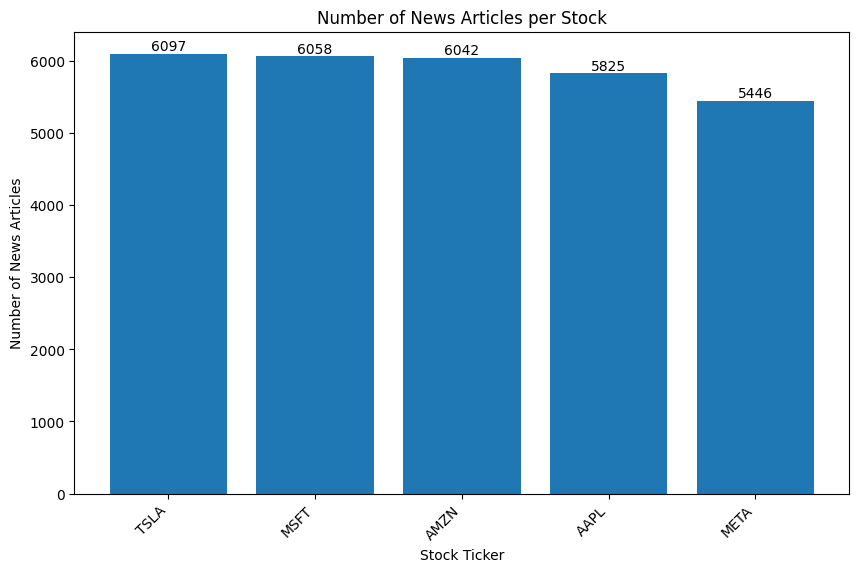

In [5]:
# Count the number of news articles per stock
news_counts = df['related'].value_counts()

# Plot the number of news articles for each stock
plt.figure(figsize=(10, 6))
bars = plt.bar(news_counts.index, news_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Stock Ticker')
plt.ylabel('Number of News Articles')
plt.title('Number of News Articles per Stock')

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

### Converting `datetime` from UNIX format to normal

In [6]:
import datetime

df['datetime_norm'] = df['datetime'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
df.head()

,datetime,headline,id,related,source,summary,url,datetime_norm
0,1673080200,Why a stock market obsessed with the Fed's inf...,118220769,AMZN,MarketWatch,The focus at the Federal Reserve is increasing...,https://finnhub.io/api/news?id=c8a2424a0b0962f...,2023-01-07 04:30:00
1,1673079469,Wall Street Breakfast: What Moved Markets,118192290,AMZN,SeekingAlpha,Listen on the go! A daily podcast of Wall Stre...,https://finnhub.io/api/news?id=95150f418540d14...,2023-01-07 04:17:49
2,1673070461,"Amazon, Not So Prime - Sell",118190452,AMZN,SeekingAlpha,Amazon is going through a rough couple of mont...,https://finnhub.io/api/news?id=9ff6320195ec697...,2023-01-07 01:47:41
3,1673069756,The Valuation Argument To Own Google,118190071,AMZN,SeekingAlpha,"Google continues to deliver record results, ye...",https://finnhub.io/api/news?id=2b7954d0a513043...,2023-01-07 01:35:56
4,1673042493,"Biggest movers of the week: Bed, Bath & Beyond...",118174798,AMZN,Yahoo,Yahoo Finance Live anchor Seana Smith looks at...,https://finnhub.io/api/news?id=4f8508ff2805da2...,2023-01-06 18:01:33


In [7]:
# Store the updated data in the same CSV file
df.to_csv('stocks_news.csv', index=False)

In [8]:
print(len(df))

29468


In [9]:
ticker_dates = df.groupby('related')['datetime_norm'].agg(['min', 'max'])

# Print the results
print("First Date and Last Date for Each Ticker:")
print(ticker_dates)

First Date and Last Date for Each Ticker:
                         min                  max
related                                          
AAPL     2021-04-27 22:56:28  2023-07-27 20:00:00
AMZN     2020-08-05 18:06:51  2023-07-27 20:00:00
META     2021-10-16 18:28:47  2023-07-27 20:08:37
MSFT     2022-12-31 20:41:00  2023-07-27 20:00:00
TSLA     2021-11-15 15:05:59  2023-07-27 17:18:43


In [10]:
sorted_df = df.sort_values(by='datetime_norm')

sorted_df.head()

,datetime,headline,id,related,source,summary,url,datetime_norm
194,1596661611,10 Biggest Retail Companies,38246089,AMZN,Yahoo,"With Walmart leading the pack, these are the 1...",https://finnhub.io/api/news?id=bb047403916e85e...,2020-08-05 18:06:51
12234,1619574988,Inside Intel: A Look at the Mega Chip Maker,66822137,AAPL,Yahoo,There's a very good chance that you've utilize...,https://finnhub.io/api/news?id=0cb6e29596b327c...,2021-04-27 22:56:28
7334,1634419727,Short Selling Guide: How to Short a Stock,71434175,META,Yahoo,Short-sellers make money by betting a stock wi...,https://finnhub.io/api/news?id=4dcc120824910c1...,2021-10-16 18:28:47
9122,1636646101,Facebook’s Advantage Over Other Social Media,72415168,META,Yahoo,"Discover the elements that define Facebook, wh...",https://finnhub.io/api/news?id=b60c520ae8c72ae...,2021-11-11 11:55:01
6241,1636749064,A Beginner's Guide to Buying Facebook (Meta) S...,72453878,META,Yahoo,"As an investor, you may think Facebook (Meta) ...",https://finnhub.io/api/news?id=1a0d2e0000c0864...,2021-11-12 16:31:04


In [11]:
df['datetime_norm'] = pd.to_datetime(df['datetime_norm'])

# Define the date range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-25')

# Use boolean indexing to filter the rows within the date range
filtered_df = df[(df['datetime_norm'] >= start_date) & (df['datetime_norm'] <= end_date)]

# Get the number of rows within the date range
num_rows_within_date_range = len(filtered_df)

print("Number of rows between", start_date.date(), "and", end_date.date(), ":", num_rows_within_date_range)

Number of rows between 2023-01-01 and 2023-07-25 : 28615


In [12]:
df['datetime_norm'] = pd.to_datetime(df['datetime_norm'])

# Step 4: Filter the DataFrame to keep rows on or after 2023-01-01
df = df[df['datetime_norm'] >= '2023-01-01']

# Step 5: Reset the index (optional if you want a continuous index after dropping rows)
df.reset_index(drop=True, inplace=True)

# Save the filtered DataFrame to a new CSV file
df.to_csv('stocks_news.csv', index=False)

print("Rows before 2023-01-01 have been dropped, and the filtered DataFrame is saved to 'filtered_stocks_news.csv'.")

Rows before 2023-01-01 have been dropped, and the filtered DataFrame is saved to 'filtered_stocks_news.csv'.


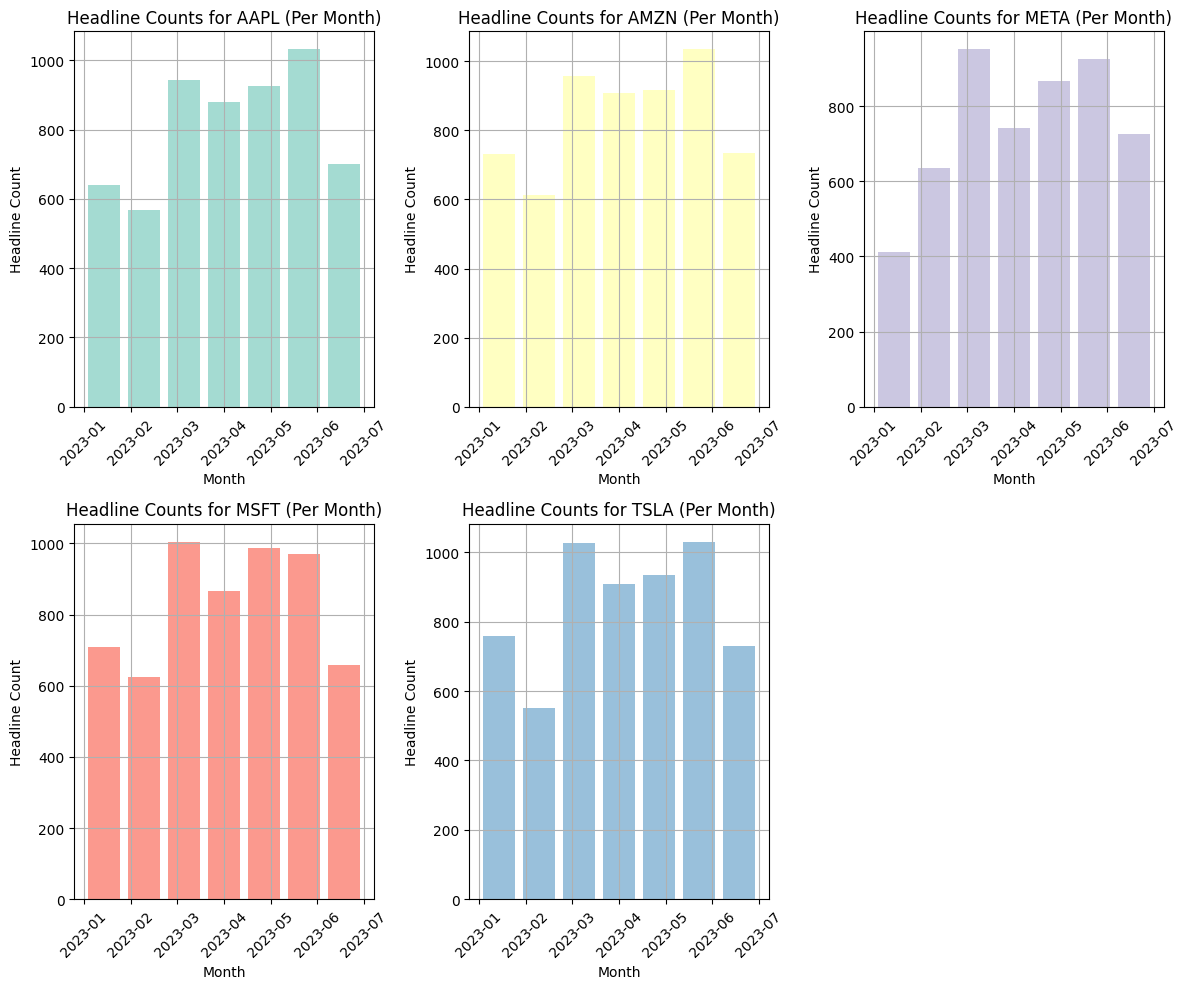

In [13]:

# Convert 'datetime_norm' column to datetime type for correct comparison
df['datetime_norm'] = pd.to_datetime(df['datetime_norm'])

# Define the date range for filtering
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-25')

# Filter the DataFrame to keep only the headlines within the date range
filtered_df = df[(df['datetime_norm'] >= start_date) & (df['datetime_norm'] <= end_date)]

# Group the filtered data by month and stock to count the number of headlines in each month for each stock
headline_counts_by_month = filtered_df.groupby([filtered_df['datetime_norm'].dt.to_period('M'), 'related']).size().reset_index(name='count')

# Convert the 'datetime_norm' values to strings representing the months
headline_counts_by_month['datetime_norm'] = headline_counts_by_month['datetime_norm'].dt.strftime('%Y-%m')

# Convert the 'count' column to numeric values
headline_counts_by_month['count'] = pd.to_numeric(headline_counts_by_month['count'])

# Get unique stocks
stocks = headline_counts_by_month['related'].unique()

# Create separate histograms for each stock to visualize the headline counts
num_plots = len(stocks)
colors = sns.color_palette('Set3', num_plots)  # Use a seaborn colormap to generate unique colors for each stock

plt.figure(figsize=(12, 10))

for i, stock in enumerate(stocks, start=1):
    stock_data = headline_counts_by_month[headline_counts_by_month['related'] == stock]
    plt.subplot(2, 3, i)
    plt.hist(stock_data['datetime_norm'], bins=len(stock_data), weights=stock_data['count'],
             alpha=0.8, color=colors[i - 1], rwidth=0.8)
    plt.xlabel('Month')
    plt.ylabel('Headline Count')
    plt.title(f'Headline Counts for {stock} (Per Month)')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

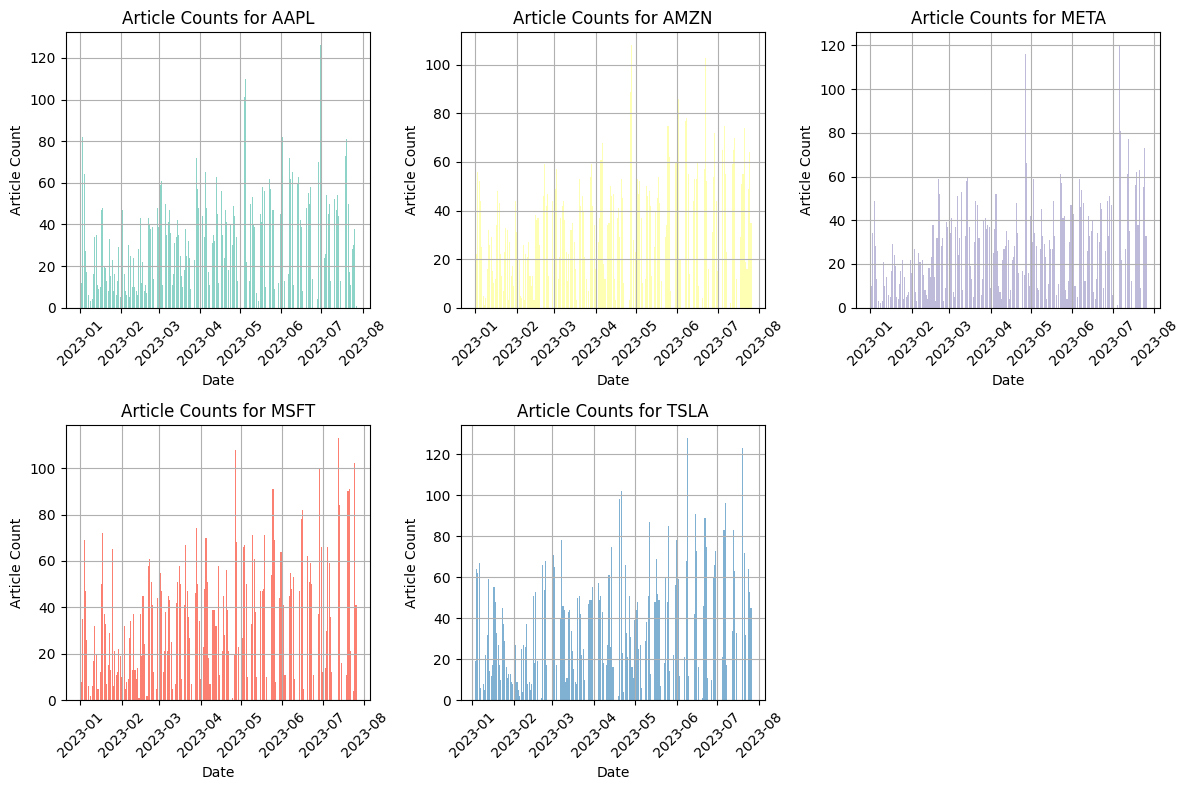

Dates with Zero Articles:
DatetimeIndex(['2023-05-21', '2023-06-04', '2023-06-25', '2023-07-02',
               '2023-07-09', '2023-07-10', '2023-07-16', '2023-07-17'],
              dtype='datetime64[ns]', freq=None)


In [14]:

# Convert 'datetime_norm' column to datetime type for correct comparison
df['datetime_norm'] = pd.to_datetime(df['datetime_norm'])

# Define the date range for filtering
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-27')

# Filter the DataFrame to keep only the headlines within the date range
filtered_df = df[(df['datetime_norm'] >= start_date) & (df['datetime_norm'] <= end_date)]

# Group the filtered data by date and stock to count the number of articles in each day for each stock
article_counts_by_date = filtered_df.groupby([filtered_df['datetime_norm'].dt.date, 'related']).size().reset_index(name='count')

# Get unique stocks
stocks = article_counts_by_date['related'].unique()

# Create separate bar plots for each stock to visualize the article counts per day
num_plots = len(stocks)
colors = sns.color_palette('Set3', num_plots)  # Use a seaborn colormap to generate unique colors for each stock

plt.figure(figsize=(12, 8))

for i, stock in enumerate(stocks, start=1):
    stock_data = article_counts_by_date[article_counts_by_date['related'] == stock]
    plt.subplot(2, 3, i)
    plt.bar(stock_data['datetime_norm'], stock_data['count'], color=colors[i - 1])
    plt.xlabel('Date')
    plt.ylabel('Article Count')
    plt.title(f'Article Counts for {stock}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Check the dates with zero articles
all_dates = pd.date_range(start=start_date, end=end_date)
missing_dates = all_dates[~all_dates.isin(article_counts_by_date['datetime_norm'])]

print("Dates with Zero Articles:")
print(missing_dates)